In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mplsoccer import FontManager
from fotmob import scraperFotmob
from sofascore import scraperSofaScore
from functions import functions_horizontal as fh

warnings.filterwarnings("ignore", category=FutureWarning)

# Obtener datos

## rutas de archivo

In [695]:
# rutas del archivo
# ruta_archivo_champion = "../data/champions/CHAMPIONSLEAGUE_PORTO_ARSENAL.json"
# ruta_archivo_champion_sofascore = "../data/champions/CHAMPIONSLEAGUE_PORTO_ARSENAL_SOFASCORE.json"

# ruta_archivo_europa = "../data/europa_league/EUROPALEAGUE_ROMA_FEYENOORD.json"
# ruta_archivo_europa_sofascore = "../data/europa_league/EUROPALEAGUE_ROMA_FEYENOORD_SOFASCORE.json"

# ruta_archivo_conference = "../data/conference_league/CONFERENCELEAGUE_DINAMO_BETIS.json"
# ruta_archivo_conference_sofascore = "../data/conference_league/CONFERENCELEAGUE_DINAMO_BETIS_SOFASCORE.json"

# ruta_archivo_premier = '../data/premier_league/PREMIERLEAGUE_CITY_UNITED.json'
# ruta_archivo_premier_sofascore = '../data/premier_league/PREMIERLEAGUE_CITY_UNITED_SOFASCORE.json'

# ruta_archivo_seriea = '../data/serieA/SERIEA_FROSINONE_LECCE.json'
# ruta_archivo_seriea_sofascore = '../data/serieA/SERIEA_FROSINONE_LECCE_SOFASCORE.json'

# ruta_archivo_laliga = '../data/la_liga/LALIGA_ATLETICO_BETIS.json'
# ruta_archivo_laliga_sofascore = '../data/la_liga/LALIGA_ATLETICO_BETIS_SOFASCORE.json'

ruta_archivo_bundesliga = '../data/bundesliga/BUNDESLIGA_HOFFENHEIM_BREMEN.json'
ruta_archivo_bundesliga_sofascore = '../data/bundesliga/BUNDESLIGA_HOFFENHEIM_BREMEN_SOFASCORE.json'

# ruta_archivo_eredivisie = '../data/eredivisie/EREDIVISIE_FORTUNA_EXCELSIOR.json'
# ruta_archivo_eredivisie_sofascore = '../data/eredivisie/EREDIVISIE_FORTUNA_EXCELSIOR_SOFASCORE.json'

# Conocimiento de la data

In [696]:
match_id = '4222125'
match_id_sofascore = '11396267'

In [697]:
scraper = scraperFotmob(match_id)
sofascore = scraperSofaScore(match_id_sofascore)

In [698]:
json_fotmob = scraper.get_json()
json_sofascore = sofascore.get_json()

In [699]:
scraper.save_json(ruta_archivo_bundesliga, json_fotmob)
sofascore.save_json(ruta_archivo_bundesliga_sofascore, json_sofascore)

In [700]:
json_data = scraper.open_json(ruta_archivo_bundesliga)
json_data_sofascore = sofascore.open_json(ruta_archivo_bundesliga_sofascore)

In [701]:
# colores de los equipos
colors = scraper.colors_teams(json_data)
colors, fonts = colors[0], colors[1]
color_home, color_away = colors[0], colors[1]
font_home, font_away = fonts[0], fonts[1]

In [702]:
# informacion del partido
info_match =  scraper.info_match(json_data)
league, round_match, country, home, away, day, referee, stadium, city_stadium = info_match[0], info_match[1], info_match[2], info_match[3], info_match[4], info_match[5], info_match[6], info_match[7], info_match[8]

In [703]:
# score e imagenes
image_score = scraper.score_image(json_data)
image_score_home, image_score_away = image_score[0], image_score[1]
score_home, image_home_url = image_score_home[0], image_score_home[1]
score_away, image_away_url = image_score_away[0], image_score_away[1]

In [704]:
# informacion del jugador del partido
info_player_match = scraper.get_info_player_match(json_data)
id_player_match, name_player_match, team_player_match, rol_player_match, player_home_away, rating_player_match = info_player_match[0], info_player_match[1], info_player_match[2], info_player_match[3], info_player_match[4], info_player_match[5]

# imagen
image_player_match = scraper.get_image_player_match(id_player_match)

# top stats del jugador del partido
top_stats_player_match = scraper.get_top_stats_player_match(json_data)
rating_player_match, min_player_match, goals_player_match, assist_player_match, shots_player_match, pass_player_match, chances_player_match, xg_player_match = top_stats_player_match[0], top_stats_player_match[1], top_stats_player_match[2], top_stats_player_match[3], top_stats_player_match[4], top_stats_player_match[5], top_stats_player_match[6], top_stats_player_match[7]

# attack stats del jugador del partido
attack_player_match = scraper.get_attack_stats_player_match(json_data)
touches_player_match, touches_box_player_match, pass_final_player_match = attack_player_match[0], attack_player_match[1], attack_player_match[2]

# defense stats del jugador del partido
defense_player_match = scraper.get_defense_player_match(json_data)
entradas_player_match, actions_player_match, recuperaciones_player_match = defense_player_match[0], defense_player_match[1], defense_player_match[2]

# duelos del jugador del partido
duel_player_match = scraper.get_duel_player_match(json_data)
duels_player_match, aereos_player_match, faltas_recibidas_player_match, cometidas_player_match = duel_player_match[0], duel_player_match[1], duel_player_match[2], duel_player_match[3]

KeyError: 'Passes into final third'

In [705]:
# minutos del partido
minutos_match = scraper.get_minute_goals(json_data)

# match momentum del partido
match_momentum = scraper.get_match_momentum(json_data, minutos_match)
match_momentum_local, match_momentum_visit, df_goles_match = match_momentum[0], match_momentum[1], match_momentum[2]

In [706]:
# estadisticas del partido
stadistics_match = scraper.get_stadistics_match(json_data)
ball_possession, xg_match, shot_match, target_match, big_chances_match, big_chances_missed_match, passes_match, fouls_match, corner_match, shots_blocked, shots_poste, shots_inside, shots_outside, long_ball, touches_in_box, offsides, tackles, bloqueos, saves, duelos, aereos, dribbles, yellow_card, red_card = stadistics_match[0], stadistics_match[1], stadistics_match[2], stadistics_match[3], stadistics_match[4], stadistics_match[5], stadistics_match[6], stadistics_match[7], stadistics_match[8], stadistics_match[9], stadistics_match[10], stadistics_match[11], stadistics_match[12], stadistics_match[13], stadistics_match[14], stadistics_match[15], stadistics_match[16], stadistics_match[17], stadistics_match[18], stadistics_match[19], stadistics_match[20], stadistics_match[21], stadistics_match[22], stadistics_match[23]

# posesion del partido
posesion = np.array(ball_possession['stats'])
posesion = np.array(posesion)
total_value = np.sum(posesion)
ratios = np.true_divide(posesion, total_value)
widths_possession = [ratio * 100 for ratio in ratios]

In [707]:
xgs_match = xg_match['stats'] # goles esperados
shots_match = shot_match['stats'] # tiros
corners_match = corner_match['stats'] # corners
offsides_match = offsides['stats'] # fuera de juego
yellow_cards = yellow_card['stats'] # tarjetas amarillas
red_cards = red_card['stats'] # tarjetas rojas

In [708]:
targets_match = target_match['stats'] # tiros a puerta
foul_match = fouls_match['stats'] # faltas
pass_match = passes_match['stats'] # pases
ball_long = long_ball['stats'] # balones largos
won_duel = duelos['stats'] # duelos ganados
dribble_match = dribbles['stats'] # regates

In [709]:
players_home = scraper.get_players_home(json_data) # jugadores de local
players_away = scraper.get_players_visit(json_data) # jugadores de visitante

# jugadores destacados
info_players_destacados = scraper.get_data_players_destacados(players_home, players_away)
image_player_home, image_player_away, df_player_home, df_player_away, player_destacado_home, player_destacado_away = info_players_destacados[0], info_players_destacados[1], info_players_destacados[2], info_players_destacados[3], info_players_destacados[4], info_players_destacados[5]

In [710]:
df_player_home

,id,posicion,nombre,camiseta,imagen,rating,isHome,stats,minutes
10,1047667,LW,Maximilian Beier,14,https://images.fotmob.com/image_resources/play...,9.0,True,"[{'title': 'Top stats', 'key': 'top_stats', 's...",77


In [711]:
df_player_away

,posicion,nombre,camiseta,imagen,rating,isHome,stats,minutes
6,RM,Mitchell Weiser,8,https://images.fotmob.com/image_resources/play...,7.9,False,"[{'title': 'Top stats', 'key': 'top_stats', 's...",90


In [712]:
# jugador local destacado
data_player_home = scraper.get_data_player_home(df_player_home)
extracted_home, recuperaciones_player_home = data_player_home[0], data_player_home[1]

# jugador visitante destacado
data_player_away = scraper.get_data_player_away(df_player_away)
extracted_away, recuperaciones_player_away = data_player_away[0], data_player_away[1]

# jugador destacado arquero
# data_player_gk_home = scraper.get_data_player_arquero(df_player_home)
# data_player_gk_away = scraper.get_data_player_arquero(df_player_away)

In [713]:
# nombre de local y visita
home_name = home['name']
away_name = away['name']
id_home = home['id']
id_away = away['id']

In [714]:
# tiros
df_tiros = pd.DataFrame(json_data['props']['pageProps']['content']['shotmap']['shots'])

In [715]:
coord_tiros = sofascore.get_coord_tiros(df_tiros, id_home, id_away)
coord_x_goal_home, coord_y_goal_home, coord_x_goal_away, coord_y_goal_away, coord_x_nogoal_home, coord_y_nogoal_home, coord_x_nogoal_away, coord_y_nogoal_away = coord_tiros[0], coord_tiros[1], coord_tiros[2], coord_tiros[3], coord_tiros[4], coord_tiros[5], coord_tiros[6], coord_tiros[7]

In [716]:
# ids de los jugadores destacados y del partido
ids_heatmap = sofascore.get_ids_heatmap(json_data_sofascore, player_destacado_home, player_destacado_away, info_player_match)
player_id_home, player_id_away, player_id_match = ids_heatmap[0], ids_heatmap[1], ids_heatmap[2]

In [717]:
info_player_match

(1047667, 'Maximilian Beier', 'TSG Hoffenheim', 'Attacker', True, '9.0')

In [718]:
player_id_home, player_id_away, player_id_match

(980628, 138150, 980628)

In [719]:
# mapas de calor
heatmap_players = sofascore.get_heatmap_players(match_id_sofascore, player_id_home, player_id_away, player_id_match)
heatmap_home, heatmap_away, heatmap_match = heatmap_players[0], heatmap_players[1], heatmap_players[2]

In [720]:
# mapa de tiros
mapa_tiros = sofascore.get_mapa_tiros(match_id_sofascore)

# xG
xg_match = sofascore.get_xg_match(mapa_tiros)
goals_home, goals_away, home_xG, away_xG = xg_match[0], xg_match[1], xg_match[2], xg_match[3]

c:\Users\NICOLE\OneDrive\Escritorio\github\soccer-data\test\sofascore.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xG['xg'] = df_xG.xg.fillna(0)


# Dashboards

In [29]:
nombre = FontManager('https://github.com/google/fonts/blob/main/ofl/comicneue/ComicNeue-Bold.ttf?raw=true')
equipos = FontManager('https://github.com/google/fonts/blob/main/ofl/abeezee/ABeeZee-Regular.ttf?raw=true')
cuerpo = FontManager('https://github.com/google/fonts/blob/main/ofl/dmsans/DMSans%5Bopsz%2Cwght%5D.ttf?raw=true')
pie = FontManager('https://github.com/google/fonts/blob/main/ofl/barlow/Barlow-Medium.ttf?raw=true')

In [721]:
colores = [f'{color_home}', f'{color_away}']

# Instagram

## 15:9

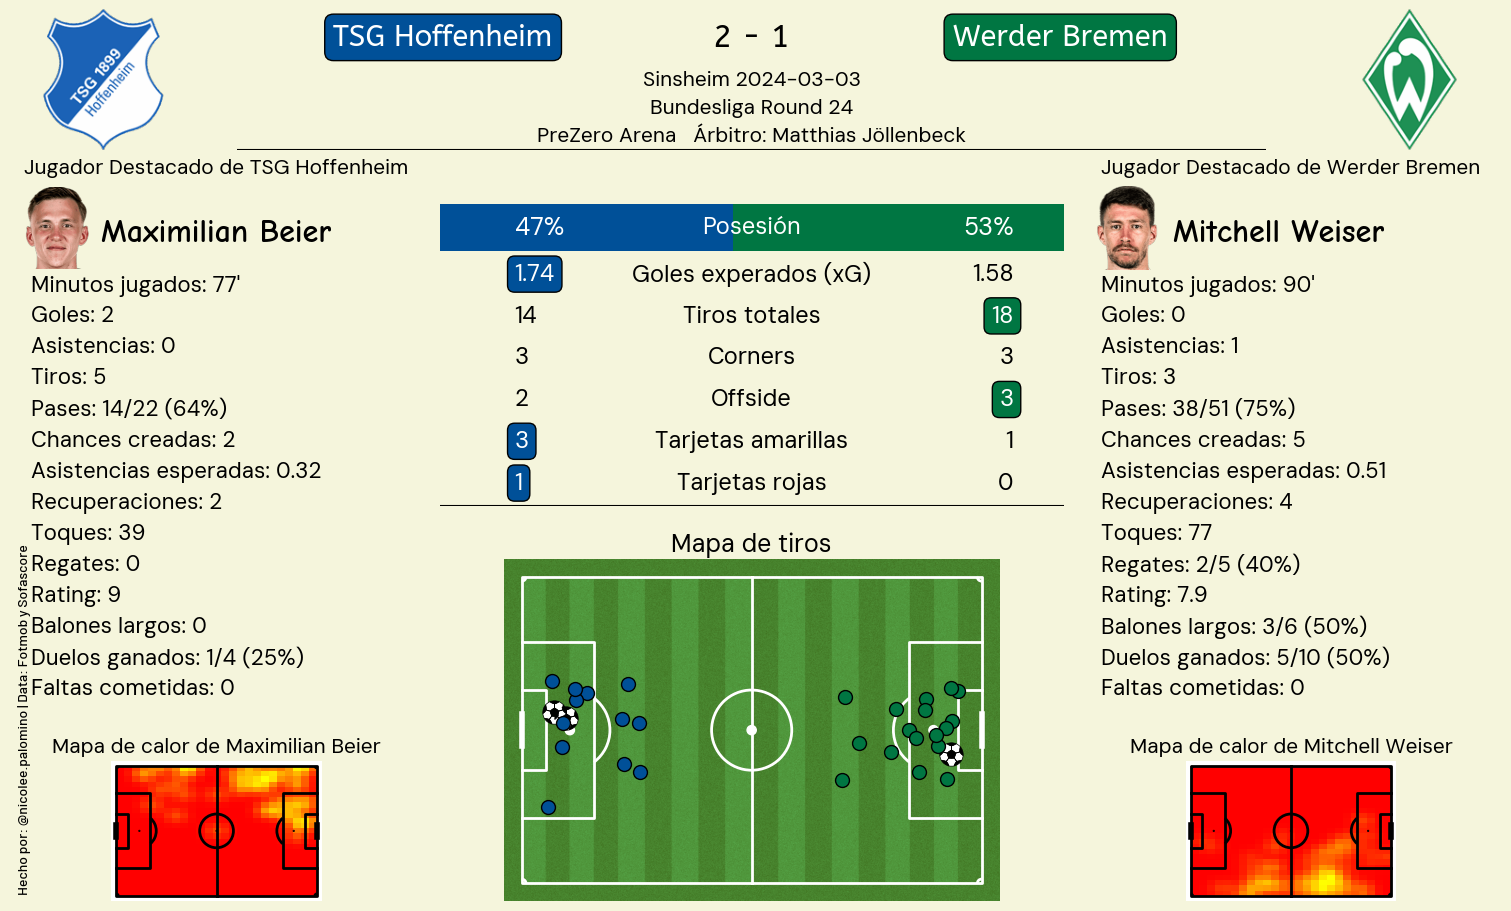

In [722]:
fig = plt.figure(figsize=(15,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=7)
fig.set_facecolor('beige')

# Escudo local
ax1 = fig.add_subplot(gs[:1, :1])
fh.get_image_escudo(ax1, image_home_url)
fh.color_ax(ax1)
fh.sacar_spines(ax1)

# Informacion del partido
ax2 = fig.add_subplot(gs[:1, 1:6])
fh.get_information_horizontal(ax2, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax(ax2)
ax2.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax2)

# Escudo visitante
ax5 = fig.add_subplot(gs[:1, 6:7])
fh.get_image_escudo(ax5, image_away_url)
fh.color_ax(ax5)
fh.sacar_spines(ax5)

# Jugador local
ax6 = fig.add_subplot(gs[1:4, :2])
ax6.set_title(f'Jugador Destacado de {home_name}', fontproperties=cuerpo.prop, size=15)
ax6_inset = ax6.inset_axes([.01, 0.82, 0.2, 0.18])
fh.get_jugador_destacado_local(ax6, player_destacado_home, extracted_home, recuperaciones_player_home, nombre, cuerpo)
# fh.get_jugador_destacado_arquero(ax6, player_destacado_home, data_player_gk_home, nombre, cuerpo)
fh.get_image_jug(ax6_inset, image_player_home)
fh.color_ax(ax6)
fh.color_ax(ax6_inset)
fh.sacar_spines(ax6)
fh.sacar_spines(ax6_inset)

# Estadisticas del partido
ax7 = fig.add_subplot(gs[1:3, 2:5])
fh.get_estadisticas_match(ax7, cuerpo, widths_possession, posesion, colores, xgs_match, shots_match, corners_match, offsides_match, yellow_cards, red_cards, colors[0], colors[1], total_value)
fh.color_ax(ax7)
fh.sacar_spines(ax7)
ax7.axhline(-.7, color='black', linestyle='solid')

# Jugador visitante
ax8 = fig.add_subplot(gs[1:4, 5:7])
ax8.set_title(f'Jugador Destacado de {away_name}', fontproperties=cuerpo.prop, size=15)
ax8_inset = ax8.inset_axes([.01, 0.82, 0.2, 0.18])
fh.get_jugador_destacado_visit(ax8, player_destacado_away, extracted_away, recuperaciones_player_away, nombre, cuerpo)
# fh.get_jugador_destacado_arquero(ax8, player_destacado_away, data_player_gk_away, nombre, cuerpo)
fh.get_image_jug(ax8_inset, image_player_away)
fh.color_ax(ax8)
fh.color_ax(ax8_inset)
fh.sacar_spines(ax8)
fh.sacar_spines(ax8_inset)

# mapa de tiros
ax9 = fig.add_subplot(gs[3:5, 2:5])
ax9.set_title('Mapa de tiros', fontproperties=cuerpo.prop, size=18)
fh.get_campo_tiros(ax9, coord_x_goal_home, coord_y_goal_home, coord_x_nogoal_home, coord_y_nogoal_home, coord_x_goal_away, coord_y_goal_away, coord_x_nogoal_away, coord_y_nogoal_away, color_home, color_away)
fh.color_ax(ax9)

# mapa de calor local
ax10 = fig.add_subplot(gs[4:5, :2])
ax10.set_title(f'Mapa de calor de {player_destacado_home[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax10, heatmap_home)

# mapa de calor visita
ax11 = fig.add_subplot(gs[4:5, 5:7])
ax11.set_title(f'Mapa de calor de {player_destacado_away[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax11, heatmap_away)

plt.figtext(.008, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10, rotation=90)
plt.savefig(f'../img/bundesliga/{home_name}_{away_name}.png', dpi=300)

## 9:10

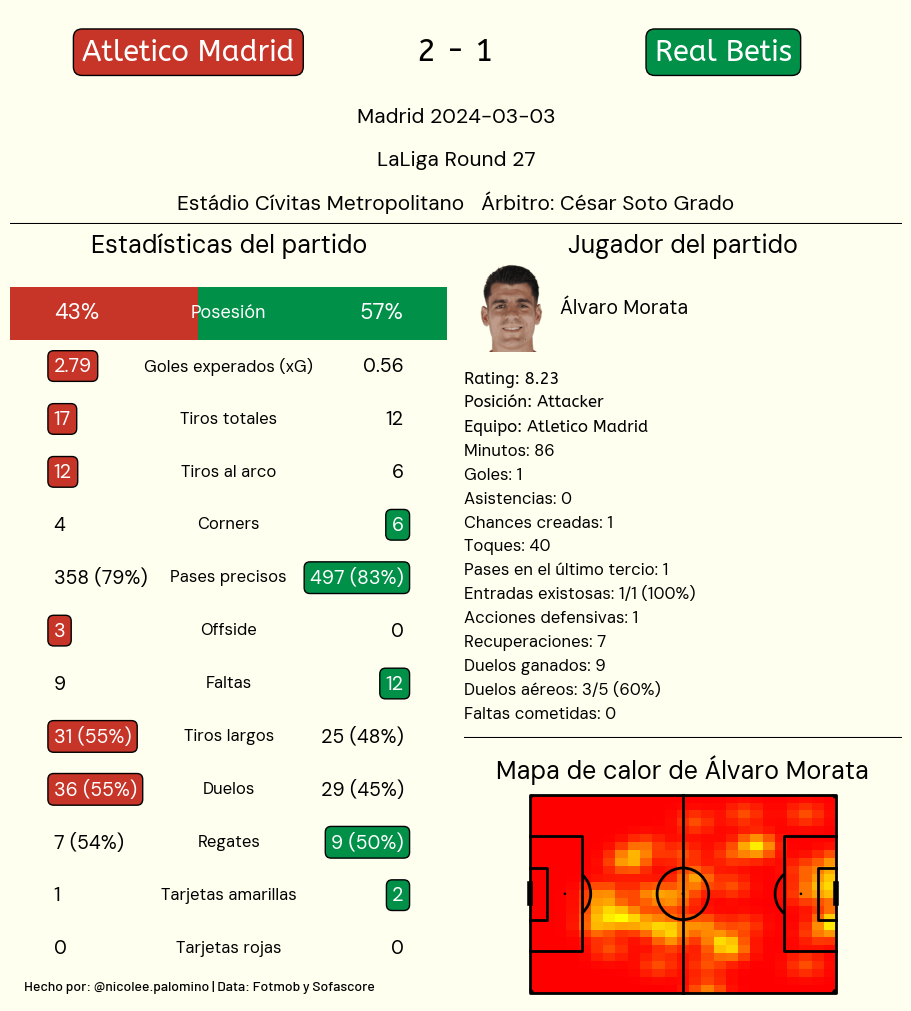

In [692]:
fig = plt.figure(figsize=(9,10),constrained_layout=True)
gs = fig.add_gridspec(nrows=4,ncols=4)
fig.set_facecolor('ivory')

# informacion
ax1 = fig.add_subplot(gs[:1, :4])
fh.get_information_horizontal(ax1, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax_vertical(ax1)
ax1.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax1)

ax2 = fig.add_subplot(gs[1:4, :2])
ax2.set_title('Estadísticas del partido', fontproperties=cuerpo.prop, size=18) 
fh.get_estadisticas_match_vertical(ax2, widths_possession, posesion, xgs_match, shots_match, targets_match, corners_match, pass_match, offsides_match, foul_match, ball_long, won_duel, dribble_match, yellow_cards, red_cards, total_value, cuerpo, colores, color_home, color_away)
fh.color_ax_vertical(ax2)
fh.sacar_spines(ax2)

# player of the match
ax4 = fig.add_subplot(gs[1:3, 2:4])
ax4.set_title('Jugador del partido', fontproperties=cuerpo.prop, size=18)
ax4_inset = ax4.inset_axes([.01, 0.80, 0.2, 0.2])
fh.get_image_jug(ax4_inset, image_player_match)
fh.get_player_match_vertical(ax4, name_player_match, rating_player_match, rol_player_match,  team_player_match, min_player_match, goals_player_match, assist_player_match, chances_player_match, touches_player_match, pass_final_player_match, entradas_player_match, actions_player_match, recuperaciones_player_match, duels_player_match, aereos_player_match, cometidas_player_match, equipos, cuerpo)
fh.color_ax_vertical(ax4)
fh.color_ax_vertical(ax4_inset)
ax4.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax4)
fh.sacar_spines(ax4_inset)

# mapa de calor
ax8 = fig.add_subplot(gs[3:4, 2:4])
ax8.set_title(f'Mapa de calor de {name_player_match}', fontproperties=cuerpo.prop, size=18)
fh.get_mapa_calor(ax8, heatmap_match)
fh.color_ax_vertical(ax8)

plt.figtext(0.02, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10)
plt.savefig(f'../img/la_liga/{home_name}_{away_name}_vertical.png', dpi=300)

# Facebook

## 15:9

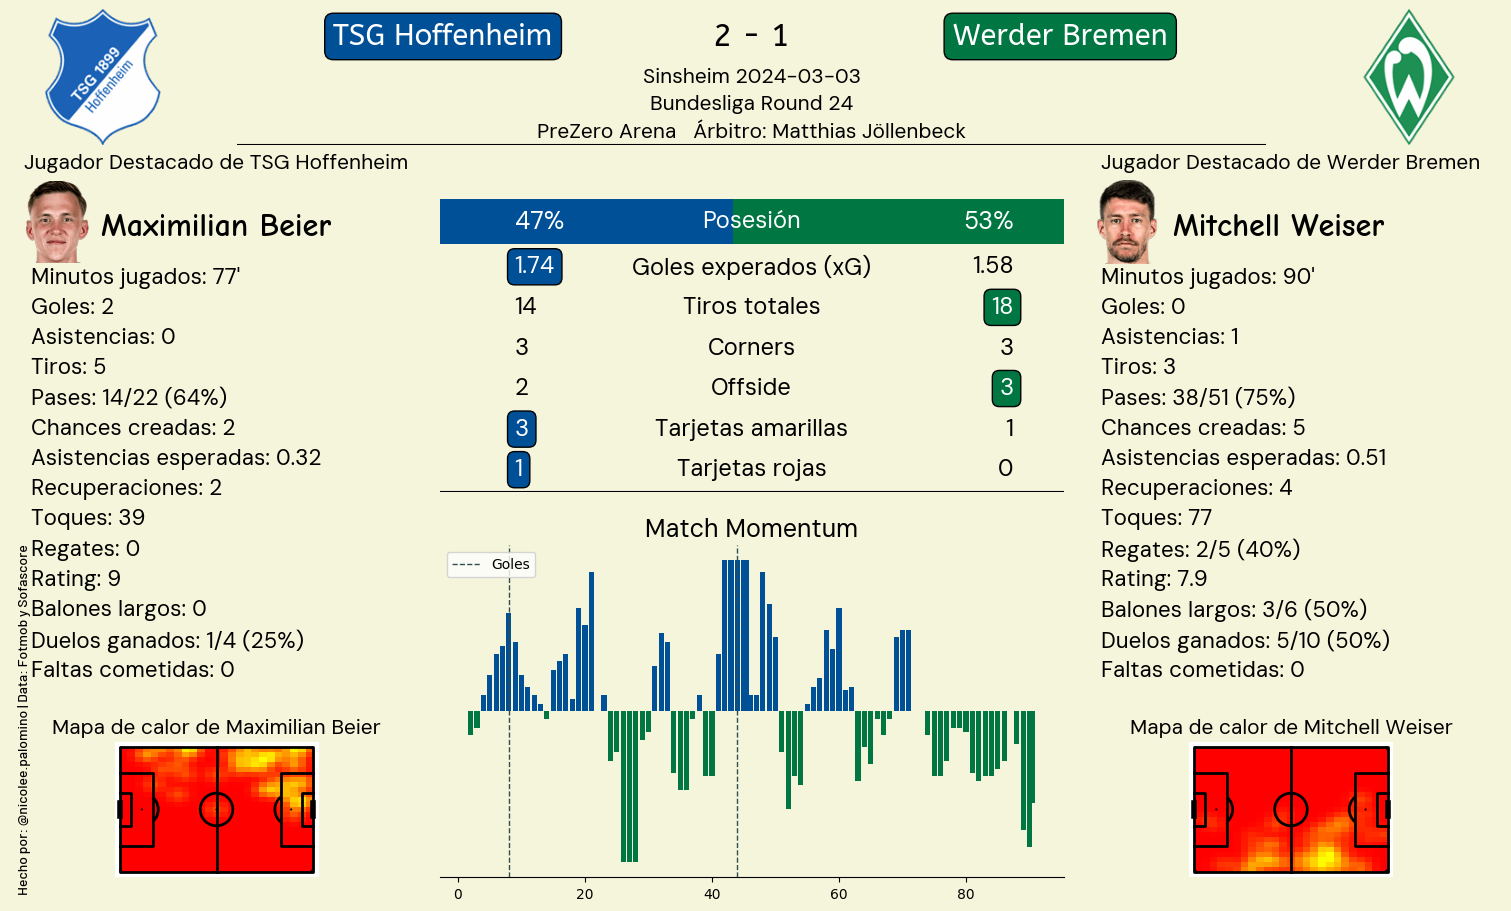

In [723]:
fig = plt.figure(figsize=(15,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=7)
fig.set_facecolor('beige')

# Escudo local
ax1 = fig.add_subplot(gs[:1, :1])
fh.get_image_escudo(ax1, image_home_url)
fh.color_ax(ax1)
fh.sacar_spines(ax1)

# Informacion del partido
ax2 = fig.add_subplot(gs[:1, 1:6])
fh.get_information_horizontal(ax2, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax(ax2)
ax2.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax2)

# Escudo visitante
ax5 = fig.add_subplot(gs[:1, 6:7])
fh.get_image_escudo(ax5, image_away_url)
fh.color_ax(ax5)
fh.sacar_spines(ax5)

# Jugador local
ax6 = fig.add_subplot(gs[1:4, :2])
ax6.set_title(f'Jugador Destacado de {home_name}', fontproperties=cuerpo.prop, size=15)
ax6_inset = ax6.inset_axes([.01, 0.82, 0.2, 0.18])
fh.get_jugador_destacado_local(ax6, player_destacado_home, extracted_home, recuperaciones_player_home, nombre, cuerpo)
# fh.get_jugador_destacado_arquero(ax6, player_destacado_home, data_player_gk_home, nombre, cuerpo)
fh.get_image_jug(ax6_inset, image_player_home)
fh.color_ax(ax6)
fh.color_ax(ax6_inset)
fh.sacar_spines(ax6)
fh.sacar_spines(ax6_inset)

# Estadisticas del partido
ax7 = fig.add_subplot(gs[1:3, 2:5])
fh.get_estadisticas_match(ax7, cuerpo, widths_possession, posesion, colores, xgs_match, shots_match, corners_match, offsides_match, yellow_cards, red_cards, colors[0], colors[1], total_value)
fh.color_ax(ax7)
fh.sacar_spines(ax7)
ax7.axhline(-.7, color='black', linestyle='solid')

# Jugador visitante
ax8 = fig.add_subplot(gs[1:4, 5:7])
ax8.set_title(f'Jugador Destacado de {away_name}', fontproperties=cuerpo.prop, size=15)
ax8_inset = ax8.inset_axes([.01, 0.82, 0.2, 0.18])
fh.get_jugador_destacado_visit(ax8, player_destacado_away, extracted_away, recuperaciones_player_away, nombre, cuerpo)
# fh.get_jugador_destacado_arquero(ax8, player_destacado_away, data_player_gk_away, nombre, cuerpo)
fh.get_image_jug(ax8_inset, image_player_away)
fh.color_ax(ax8)
fh.color_ax(ax8_inset)
fh.sacar_spines(ax8)
fh.sacar_spines(ax8_inset)

# mapa de tiros
ax9 = fig.add_subplot(gs[3:5, 2:5])
ax9.set_title('Match Momentum', fontproperties=cuerpo.prop, size=18)
# ax9.set_title('xG Flow Chart', fontproperties=cuerpo.prop, size=18)
fh.get_match_momentum_horizontal(ax9, df_goles_match, match_momentum_local, match_momentum_visit, color_home, color_away)
# fh.get_xg_flow_chart(ax9, home_xG, away_xG, home_name, away_name, goals_home, goals_away, color_home, color_away)
fh.color_ax(ax9)

# mapa de calor local
ax10 = fig.add_subplot(gs[4:5, :2])
ax10.set_title(f'Mapa de calor de {player_destacado_home[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax10, heatmap_home)

# mapa de calor visita
ax11 = fig.add_subplot(gs[4:5, 5:7])
ax11.set_title(f'Mapa de calor de {player_destacado_away[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax11, heatmap_away)

plt.figtext(.008, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10, rotation=90)
plt.savefig(f'../img/bundesliga/{home_name}_{away_name}_2.png', dpi=300)

## 9:15

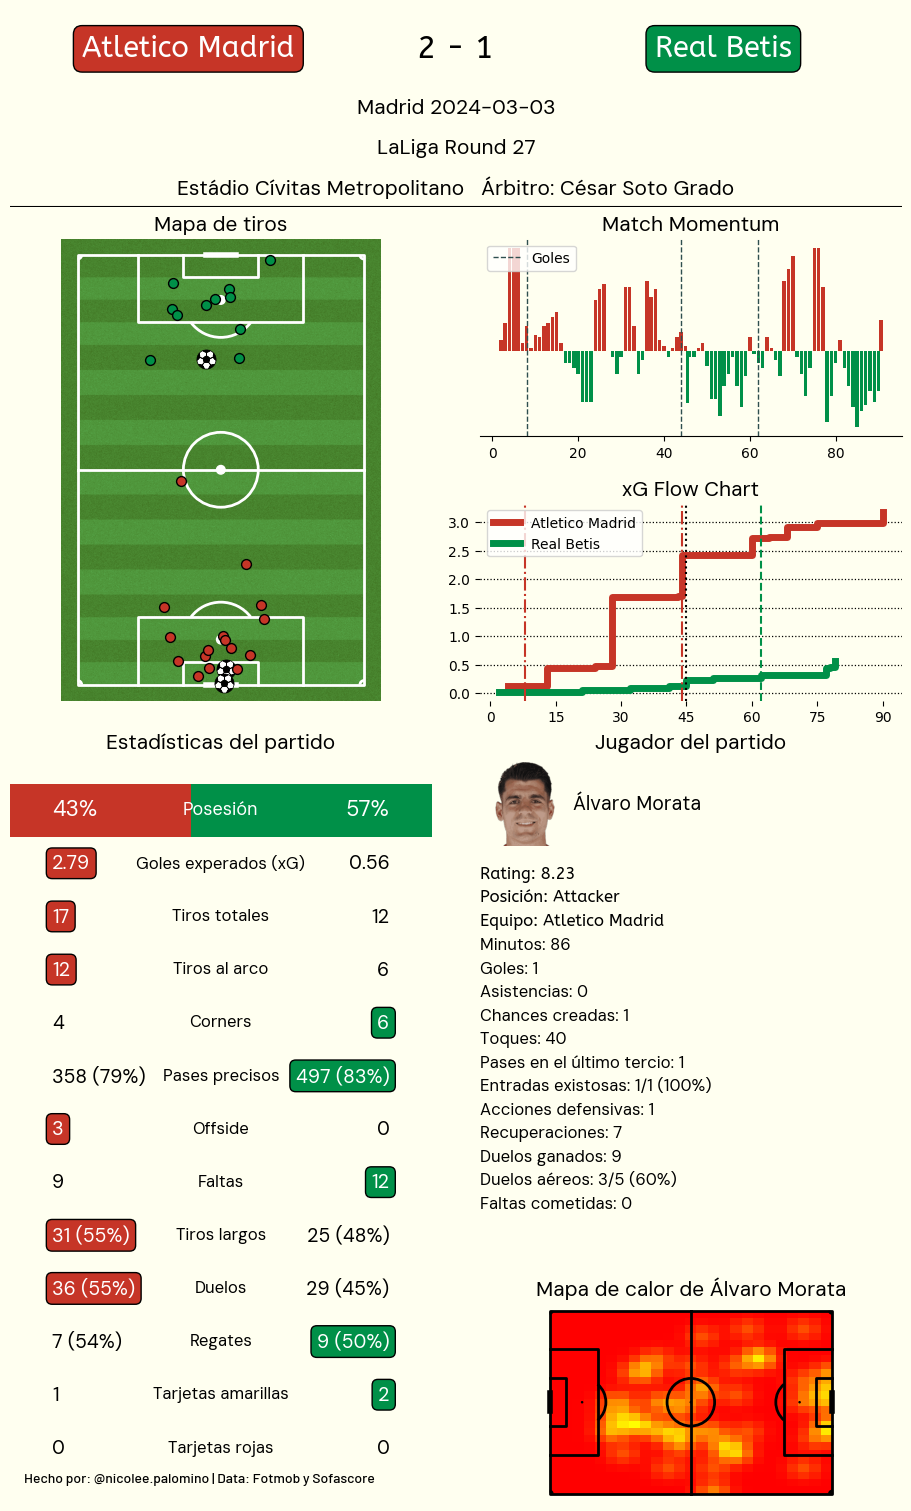

In [694]:
fig = plt.figure(figsize=(9,15),constrained_layout=True)
gs = fig.add_gridspec(nrows=6,ncols=4)
fig.set_facecolor('ivory')

# informacion
ax1 = fig.add_subplot(gs[:1, :4])
fh.get_information_horizontal(ax1, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax_vertical(ax1)
ax1.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax1)

# mapa de tiros
ax2 = fig.add_subplot(gs[1:3, :2])
ax2.set_title('Mapa de tiros', fontproperties=cuerpo.prop, size=15)
fh.get_campo_tiros_vertical(ax2, coord_x_goal_home, coord_y_goal_home, coord_x_nogoal_home, coord_y_nogoal_home, coord_x_goal_away, coord_y_goal_away, coord_x_nogoal_away, coord_y_nogoal_away, color_home, color_away)
fh.color_ax_vertical(ax2)
fh.sacar_spines(ax2)

# match
ax3 = fig.add_subplot(gs[1:2, 2:4])
ax3.set_title('Match Momentum', fontproperties=cuerpo.prop, size=15) 
fh.get_match_momentum_horizontal(ax3, df_goles_match, match_momentum_local, match_momentum_visit, color_home, color_away)
fh.color_ax_vertical(ax3)
# fh.sacar_spines(ax3)

# xg
ax4 = fig.add_subplot(gs[2:3, 2:4])
ax4.set_title('xG Flow Chart', fontproperties=cuerpo.prop, size=15) 
fh.get_xg_flow_chart(ax4, home_xG, away_xG, home_name, away_name, goals_home, goals_away, color_home, color_away)
fh.color_ax_vertical(ax4)
# fh.sacar_spines(ax4)

# estadisticas
ax5 = fig.add_subplot(gs[3:6, :2])
ax5.set_title('Estadísticas del partido', fontproperties=cuerpo.prop, size=15) 
fh.get_estadisticas_match_vertical(ax5, widths_possession, posesion, xgs_match, shots_match, targets_match, corners_match, pass_match, offsides_match, foul_match, ball_long, won_duel, dribble_match, yellow_cards, red_cards, total_value, cuerpo, colores, color_home, color_away)
fh.color_ax_vertical(ax5)
fh.sacar_spines(ax5)

# player of the match
ax6 = fig.add_subplot(gs[3:5, 2:4])
ax6.set_title('Jugador del partido', fontproperties=cuerpo.prop, size=15)
ax6_inset = ax6.inset_axes([.01, 0.80, 0.2, 0.2])
fh.get_image_jug(ax6_inset, image_player_match)
fh.get_player_match_vertical(ax6, name_player_match, rating_player_match, rol_player_match,  team_player_match, min_player_match, goals_player_match, assist_player_match, chances_player_match, touches_player_match, pass_final_player_match, entradas_player_match, actions_player_match, recuperaciones_player_match, duels_player_match, aereos_player_match, cometidas_player_match, equipos, cuerpo)
fh.color_ax_vertical(ax6)
fh.color_ax_vertical(ax6_inset)
fh.sacar_spines(ax6)
fh.sacar_spines(ax6_inset)

# mapa de calor
ax7 = fig.add_subplot(gs[5:6, 2:4])
ax7.set_title(f'Mapa de calor de {name_player_match}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax7, heatmap_match)
fh.color_ax_vertical(ax7)

plt.figtext(0.02, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10)
plt.savefig(f'../img/la_liga/{home_name}_{away_name}_vertical_2.png', dpi=300)